### The dataset for this competition (both train and test) was generated from a deep learning model trained on the Wild blueberry Yield Prediction Dataset. (Since this is Playground 3.14, it seems like we need a Blueberry Pie joke here?) Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]


In [2]:
train=pd.read_csv('train.csv')
train

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [3]:
test=pd.read_csv('test.csv')
test

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
10190,25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
10191,25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724
10192,25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847


In [4]:
combined=pd.concat([train,test],ignore_index=True)
combined

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN
25481,25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847,NaN


# Describe

In [5]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25483 entries, 0 to 25482
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25483 non-null  int64  
 1   clonesize             25483 non-null  float64
 2   honeybee              25483 non-null  float64
 3   bumbles               25483 non-null  float64
 4   andrena               25483 non-null  float64
 5   osmia                 25483 non-null  float64
 6   MaxOfUpperTRange      25483 non-null  float64
 7   MinOfUpperTRange      25483 non-null  float64
 8   AverageOfUpperTRange  25483 non-null  float64
 9   MaxOfLowerTRange      25483 non-null  float64
 10  MinOfLowerTRange      25483 non-null  float64
 11  AverageOfLowerTRange  25483 non-null  float64
 12  RainingDays           25483 non-null  float64
 13  AverageRainingDays    25483 non-null  float64
 14  fruitset              25483 non-null  float64
 15  fruitmass          

In [6]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
id,25483.0,12741.000000,7356.452791,0.000000,6370.500000,12741.000000,19111.500000,25482.000000
clonesize,25483.0,19.741200,6.593895,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,25483.0,0.390231,0.373249,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,25483.0,0.286584,0.059896,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,25483.0,0.492136,0.148134,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,25483.0,0.592702,0.139650,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,25483.0,82.184739,9.149237,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,25483.0,49.682851,5.548662,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,25483.0,68.668881,7.644002,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,25483.0,59.240309,6.613090,50.200000,55.800000,62.000000,62.000000,68.200000


In [7]:
# isnull
combined.isnull().sum()
# No null value

id                          0
clonesize                   0
honeybee                    0
bumbles                     0
andrena                     0
osmia                       0
MaxOfUpperTRange            0
MinOfUpperTRange            0
AverageOfUpperTRange        0
MaxOfLowerTRange            0
MinOfLowerTRange            0
AverageOfLowerTRange        0
RainingDays                 0
AverageRainingDays          0
fruitset                    0
fruitmass                   0
seeds                       0
yield                   10194
dtype: int64

In [8]:
# dropping id column as it is unnecessary
df=combined.drop('id',axis=1)
df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN
25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847,NaN


# Univariate analysis

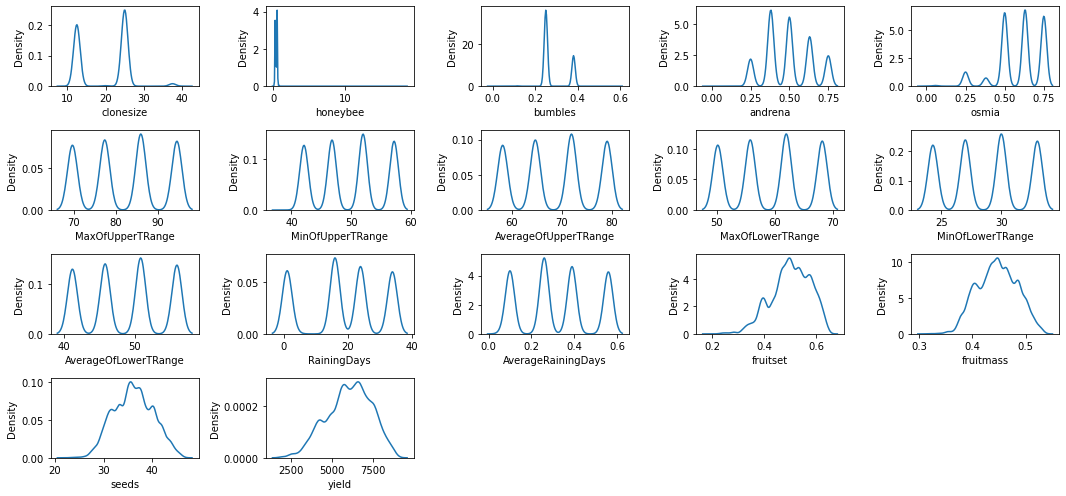

In [9]:
it=1
for i in df.columns:
    plt.subplot(4,5,it)
    sns.kdeplot(df[i])
    it+=1
plt.tight_layout()
plt.show()

-0.29119496049488897


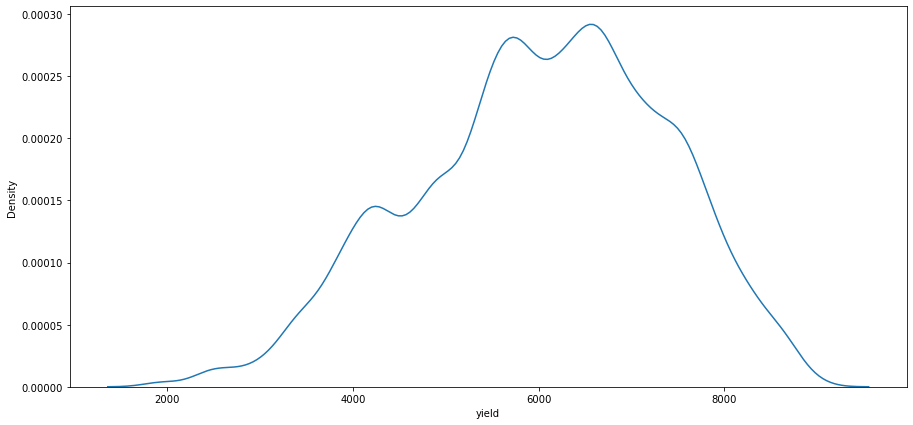

In [10]:
#  Target columns
sns.kdeplot(df['yield'])
print(df['yield'].skew())
plt.show()

#  Its is left skewed

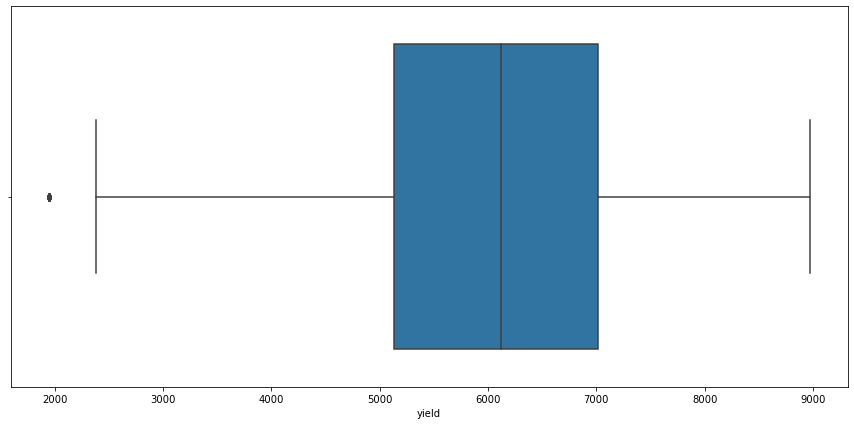

In [11]:
sns.boxplot(df['yield'])
plt.show()

# we can see one outliers

# Bivariate analysis

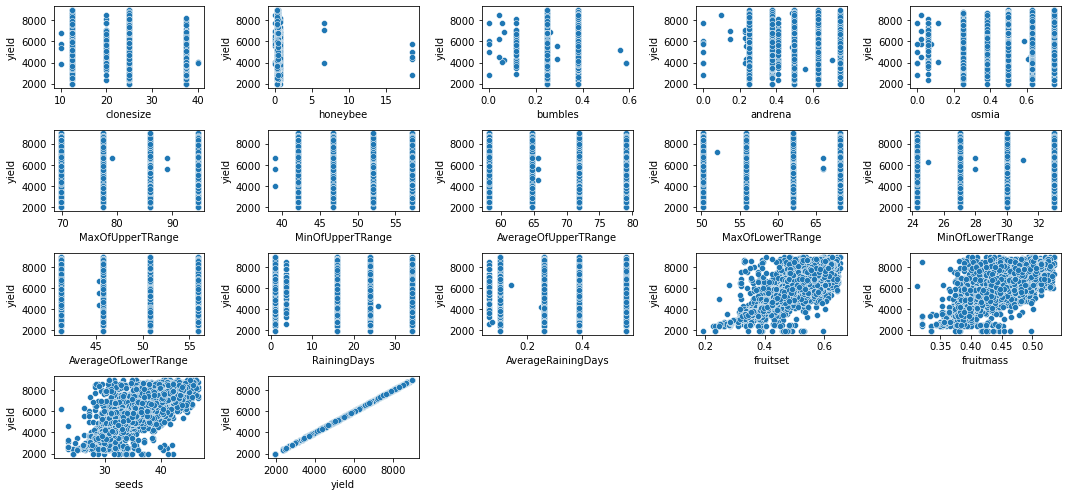

In [12]:
it=1
for i in df.columns:
    plt.subplot(4,5,it)
    sns.scatterplot(df[i],df['yield'])
    it+=1
plt.tight_layout()
plt.show()

# cant see much patterns

# Multivariant analysis

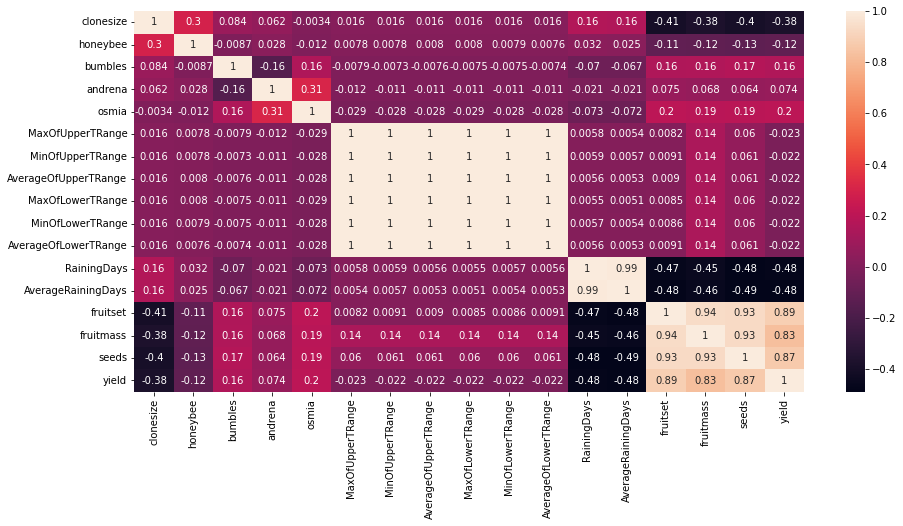

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* Target column is highly correlated with fruitset,fruitmass and seeds
*  We can observe multicollinearity between many columns
*  fruitset,fruitmass and seeds are also highly correlated
*  It seems like Trange 6 columns are repeated so dropped all keeping one which is highly correlated with target than others-MaxofUpperTrange
*  RainingDays and AverageRainingDays also are highly correlated

In [14]:
new_df=df.drop(columns=['MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange'])
new_df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,16.0,0.26,0.568854,0.463065,37.724724,NaN
25481,12.5,0.25,0.25,0.38,0.50,94.6,34.0,0.56,0.407374,0.409261,31.881847,NaN


In [15]:
#  Dropping AverageRainingDays 
new_df=new_df.drop(columns=['AverageRainingDays'])
new_df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,24.0,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,16.0,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,16.0,0.568854,0.463065,37.724724,NaN
25481,12.5,0.25,0.25,0.38,0.50,94.6,34.0,0.407374,0.409261,31.881847,NaN


<AxesSubplot:>

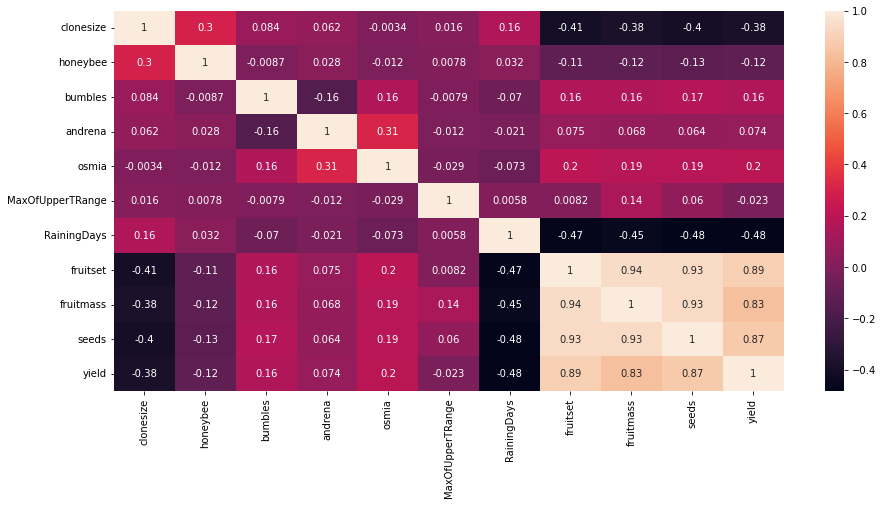

In [16]:
sns.heatmap(new_df.corr(),annot=True)

# checking for outliers

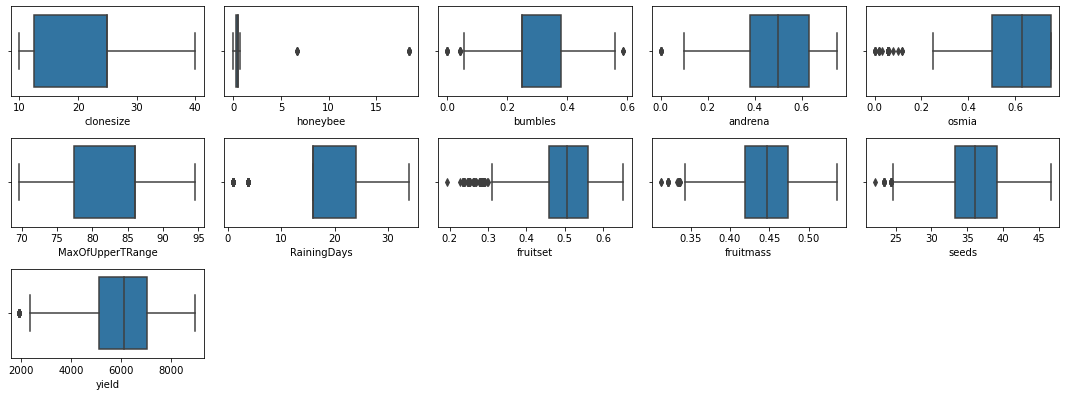

In [17]:
it=1
for i in new_df.columns:
    plt.subplot(4,5,it)
    sns.boxplot(df[i])
    it+=1
plt.tight_layout()
plt.show()

* There are mostly outliers columns other than clonesize and MaxOfUpperTRange
* Not preferred to remove outliers as its important for prediction

In [18]:
# # Checking for duplicates
# new_df[new_df.duplicated()]

# #  10 duplicated columns

In [19]:
# # dropping the duplicated columns
# print('Before removing',new_df.shape)
# new_df=new_df.drop_duplicates()
# print('After removing',new_df.shape)

In [20]:
new_df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.579677,0.494165,40.484512,7479.93417


#  Split the data

In [21]:
train.shape,test.shape

((15289, 18), (10194, 17))

In [22]:
new_df.shape

(25483, 11)

In [23]:
newtrain=new_df.loc[0:train.shape[0]-1,:]
newtrain

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,16.0,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,34.0,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,34.0,0.422548,0.416786,32.299059,4696.44394
15287,25.0,0.50,0.25,0.63,0.63,69.7,24.0,0.542170,0.434133,36.674243,6772.93347


In [24]:
newtest=new_df.loc[train.shape[0]:,:]
newtest.drop('yield',axis=1,inplace=True)
newtest

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds
15289,25.0,0.25,0.25,0.25,0.25,86.0,24.0,0.399367,0.408088,31.394569
15290,12.5,0.25,0.25,0.75,0.63,94.6,1.0,0.488048,0.442866,36.846956
15291,12.5,0.25,0.25,0.63,0.63,86.0,16.0,0.583379,0.487057,40.037644
15292,25.0,0.50,0.38,0.38,0.63,86.0,16.0,0.433014,0.422847,33.116091
15293,37.5,0.75,0.25,0.25,0.25,94.6,24.0,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,24.0,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,16.0,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,16.0,0.568854,0.463065,37.724724
25481,12.5,0.25,0.25,0.38,0.50,94.6,34.0,0.407374,0.409261,31.881847


In [25]:
newtrain.shape,newtest.shape

((15289, 11), (10194, 10))

# Statstical test

In [26]:
significant_feat=[]
for i in newtrain.columns:
    if i!= 'yield':
        if stats.ttest_ind(newtrain[i],newtrain['yield'])[1]<0.05:
            print(i,stats.ttest_ind(newtrain[i],newtrain['yield'])[1])
            significant_feat.append(i)
        else:
            print(i,stats.ttest_ind(newtrain[i],newtrain['yield'])[1])
print('Significant features are ',significant_feat)

clonesize 0.0
honeybee 0.0
bumbles 0.0
andrena 0.0
osmia 0.0
MaxOfUpperTRange 0.0
RainingDays 0.0
fruitset 0.0
fruitmass 0.0
seeds 0.0
Significant features are  ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds']


# scaling

In [27]:
df_cols=newtest.columns
df_cols

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in df_cols:
    newtrain.loc[:,i]=ss.fit_transform(pd.DataFrame(newtrain.loc[:,i]))
    newtest.loc[:,i]=ss.transform(pd.DataFrame(newtest.loc[:,i]))

In [29]:
newtrain.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds,yield
0,0.802929,0.306073,-0.613664,1.737386,-0.662120,-1.363365,0.458012,-1.044938,-0.783260,-0.918905,4476.81146
1,0.802929,0.306073,-0.613664,0.049454,-0.662120,-1.363365,0.458012,-0.777454,-0.661588,-0.572230,5548.12201
2,-1.092448,-0.385238,-0.613664,0.927179,0.269883,0.418756,0.458012,0.674659,0.656157,0.540029,6869.77760
3,-1.092448,-0.385238,-0.613664,0.927179,-0.662120,-0.521504,0.458012,0.850087,0.852832,0.819312,6880.77590
4,0.802929,0.306073,-0.613664,0.927179,0.269883,-0.521504,0.458012,1.034261,1.285628,1.071598,7479.93417


In [30]:
newtest.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds
15289,0.802929,-0.385238,-0.613664,-1.638479,-2.454434,0.418756,0.458012,-1.389674,-1.038628,-1.183437
15290,-1.092448,-0.385238,-0.613664,1.737386,0.269883,1.359016,-1.515018,-0.197520,-0.099560,0.169192
15291,-1.092448,-0.385238,-0.613664,0.927179,0.269883,0.418756,-0.228259,1.084029,1.093698,0.960739
15292,0.802929,0.306073,1.556078,-0.760754,0.269883,0.418756,-0.228259,-0.937347,-0.640116,-0.756362
15293,2.698305,0.997385,-0.613664,-1.638479,-2.454434,1.359016,0.458012,-1.905506,-1.557820,-1.639049


# Modelling 

In [31]:
x=newtrain.drop('yield',axis=1)
y=newtrain['yield']

## Linear statstical model

In [32]:
import statsmodels.api as sma
newx=sma.add_constant(x)
model=sma.OLS(y,newx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     6500.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        12:55:23   Log-Likelihood:            -1.1906e+05
No. Observations:               15289   AIC:                         2.382e+05
Df Residuals:                   15278   BIC:                         2.382e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6025.1940      4.719   1276.870      0.000    6015.945    6034.443
clonesize          -30.3520      5.531     -5.488      0.000     -41.193     -19.511
honeybee            -0.2768      4.975     -0.056      0.956     -10.028       9.475
bumbles             22.0824      5.059      4.365      0.000      12.167      31.998
andrena             18.0204      5.140      3.506      0.000       7.946      28.095
osmia                7.7831      5.167      1.506      0.132      -2.344      17.910
MaxOfUpperTRange   -26.0686      5.159     -5.053      0.000     -36.181     -15.956
RainingDays        -80.5088      5.404    -14.898      0.000     -91.101     -69.917
fruitset           887.9488     16.165     54.929      0.000     856.263     919.635
fruitmass         -290.0167     16.573    -17.499      0.000    -322.502    -257.531
seeds              550.7157     14.768     37.290      0.000     521.768     579.664
==============================================================================
Omnibus:                     3073.283   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63299.568
Skew:                           0.422   Prob(JB):                         0.00
Kurtosis:                      12.932   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
kf=KFold()
lr=LinearRegression()
pred_lr=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred_lr).T.mean(axis=1)


In [34]:
sub=pd.DataFrame({'id':test.id,
                        'yield':finalpred})
sub.head()

,id,yield
0,15289,4306.361004
1,15290,6111.383574
2,15291,7245.671285
3,15292,4967.705199
4,15293,3665.604193


In [108]:
sub.to_csv('Linearmodel.csv',index=False)    # 363.00302

##  Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
kf=KFold()
pred_rf=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_rf.append(rf.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_rf).T.mean(axis=1)


In [115]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('Randomforestnew.csv',index=False)     # 352.35

## Adaboost regressor

In [112]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
kf=KFold()
pred_ad=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]   
    pred_ad.append(ad.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_ad).T.mean(axis=1)

In [113]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('Adaboostregressor.csv',index=False)    # 546.84

## Decision Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
kf=KFold()
pred_dt=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_dt.append(dt.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_dt).T.mean(axis=1)

In [120]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('Decisontree.csv',index=False)    # 414.17

## GradientBoosting

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
kf=KFold()
pred_gb=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_gb.append(gb.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_gb).T.mean(axis=1)

In [122]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('Gradientboosting.csv',index=False)    # 346.60

## XGBoost

In [123]:
from xgboost import XGBRegressor
xg=XGBRegressor()
kf=KFold()
pred_xg=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xg.append(xg.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_xg).T.mean(axis=1)

In [124]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('xgboost.csv',index=False)    # 349.422

## Lightgbm

In [125]:
from lightgbm import LGBMRegressor
lg=LGBMRegressor()
kf=KFold()
pred_lg=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lg.append(lg.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_lg).T.mean(axis=1)

In [126]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('lightgbm.csv',index=False)    # 343.93

## stacking

In [127]:
from sklearn.ensemble import StackingRegressor

rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
xg=XGBRegressor()

base=[('randomf',rf),('gradient',gb),('xgboost',xg)]
final=LGBMRegressor()
stack=StackingRegressor(estimators=base,final_estimator=final)

kf=KFold()
pred_stack=[]

for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_stack.append(stack.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_stack).T.mean(axis=1)

In [128]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('stacking.csv',index=False)    # 344.91

# Hyper tuning lightgbm

In [130]:
from sklearn.model_selection import GridSearchCV
lg=LGBMRegressor()
kf=KFold()

paramgrid={
    'n_estimators':[100,200,300],
    'max_depth':[2,3,4,None],
    'learning_rate':[0.1,0.001,0.2,0.4]}

for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
        
cv=GridSearchCV(estimator=lg,param_grid=paramgrid,cv=3,scoring='neg_mean_absolute_error')
cv.fit(xtrain,ytrain)
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [132]:
lg=LGBMRegressor(n_estimators=100,max_depth=4,learning_rate=0.1)
kf=KFold()
pred_lg1=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lg1.append(lg.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_lg1).T.mean(axis=1)

In [133]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('lightgbmhypertuned.csv',index=False)    # 344.99

## Hyper tuned gradient boost

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor()
kf=KFold()

paramgrid={
    'n_estimators':[100,150,200,],
    'max_depth':[2,3,None],
    'learning_rate':[0.1,0.001,0.2],
    }

for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
        
cv=GridSearchCV(estimator=gb,param_grid=paramgrid,cv=3)
cv.fit(xtrain,ytrain)
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

In [37]:
gb=GradientBoostingRegressor(n_estimators=150,max_depth=3,learning_rate=0.1)
kf=KFold()
pred_gb1=[]
for train_index,test_index in kf.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_gb1.append(gb.fit(xtrain,ytrain).predict(newtest))
final_pred=pd.DataFrame(pred_gb1).T.mean(axis=1)

In [38]:
sub=pd.DataFrame({'id':test.id,
                 'yield':final_pred})
sub.to_csv('Gradientboosting_hypertuned.csv',index=False)    # 346.02